<a href="https://colab.research.google.com/github/klydem11/AI_CW/blob/master/Reading_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports, extract_letters class and assignLetters function

In [ ]:
!pip install scipy==1.1.0

In [ ]:
import time
import requests
import zipfile
import io
import os
import glob
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog
import natsort 
import warnings
warnings.filterwarnings('ignore')


In [ ]:
r = requests.get('https://github.com/klydem11/AI_CW/raw/master/languageRecognition.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        #bw = (image < 120).astype(np.float)
        bw = (image < 200).astype(np.float) #u  increased the size

        # remove artifacts connected to image border
        cleared = bw.copy()
        #clear_border(cleared)
        
        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()
        #print (label_image.max())

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
        ax.imshow(bw, cmap='jet')

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)
                ax.add_patch(rect)

        ax.set_axis_off()
        plt.tight_layout()
        plt.show()

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
        print ('Characters recognized: ' + str(len(final)))
        return final

In [ ]:
#again with smaller image region
class Extract_Letters2:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        #bw = (image < 120).astype(np.float)
        bw = (image < 250).astype(np.float) #u  increased the size

        # remove artifacts connected to image border
        cleared = bw.copy()
        #clear_border(cleared)
        
        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()
        #print (label_image.max())

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
        ax.imshow(bw, cmap='jet')

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)
                ax.add_patch(rect)

        ax.set_axis_off()
        plt.tight_layout()
        plt.show()

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
        print ('Characters recognized: ' + str(len(final)))
        return final

In [ ]:
def assignLetters(training_files, folder_string, letter_string, language):
  print("Extracting characters...")
  start_time = time.time()
  extract = Extract_Letters()
  extract2 = Extract_Letters2()
  name_counter = 600
  for files in training_files:
      letters = extract.extractFile(files)
      string_counter = 0
      for i in letters:
        if string_counter > ((len(folder_string)) -1):
           string_counter = 0
        imsave('./languageRecognition/' + language + '/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        print ('training character: ' + str(folder_string[string_counter]) + ' (' + str(name_counter) + '/' + str(len(letters)) + ')')
        string_counter += 1
        name_counter += 1

  print (time.time() - start_time, "seconds" )

extract = Extract_Letters()
extract2 = Extract_Letters2()

# Greek Training

Extracting characters...


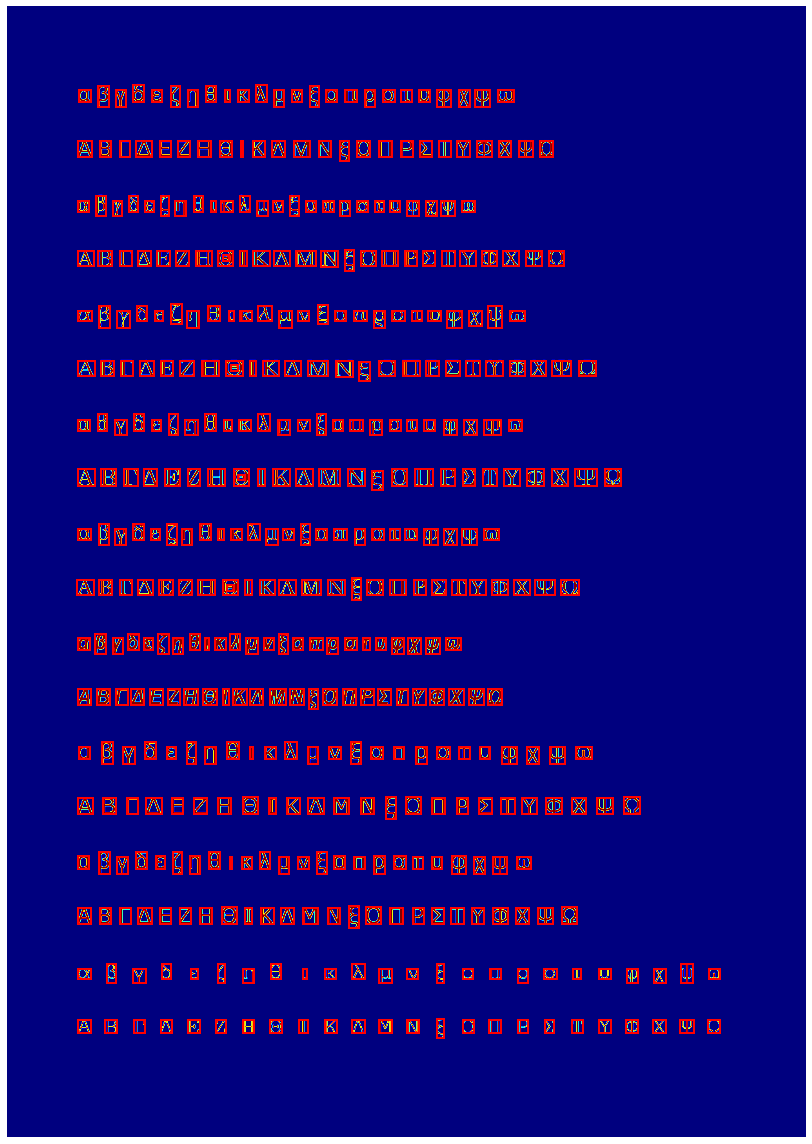

Characters recognized: 432
training character: α (600/432)
training character: β (601/432)
training character: γ (602/432)
training character: δ (603/432)
training character: ε (604/432)
training character: ζ (605/432)
training character: η (606/432)
training character: θ (607/432)
training character: ι (608/432)
training character: κ (609/432)
training character: λ (610/432)
training character: μ (611/432)
training character: ν (612/432)
training character: ξ (613/432)
training character: ο (614/432)
training character: π (615/432)
training character: ρ (616/432)
training character: σ (617/432)
training character: τ (618/432)
training character: υ (619/432)
training character: φ (620/432)
training character: χ (621/432)
training character: ψ (622/432)
training character: ω (623/432)
training character: α (624/432)
training character: β (625/432)
training character: γ (626/432)
training character: δ (627/432)
training character: ε (628/432)
training character: ζ (629/432)
training char

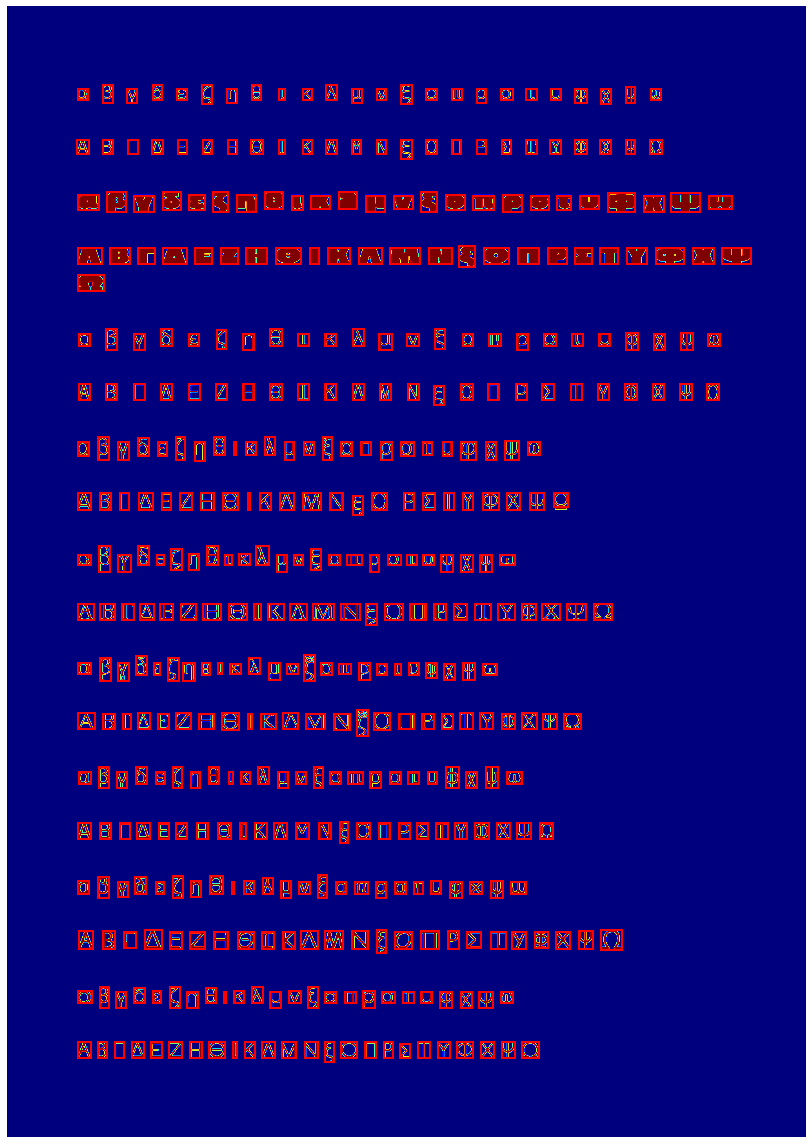

Characters recognized: 431
training character: α (1032/431)
training character: β (1033/431)
training character: γ (1034/431)
training character: δ (1035/431)
training character: ε (1036/431)
training character: ζ (1037/431)
training character: η (1038/431)
training character: θ (1039/431)
training character: ι (1040/431)
training character: κ (1041/431)
training character: λ (1042/431)
training character: μ (1043/431)
training character: ν (1044/431)
training character: ξ (1045/431)
training character: ο (1046/431)
training character: π (1047/431)
training character: ρ (1048/431)
training character: σ (1049/431)
training character: τ (1050/431)
training character: υ (1051/431)
training character: φ (1052/431)
training character: χ (1053/431)
training character: ψ (1054/431)
training character: ω (1055/431)
training character: α (1056/431)
training character: β (1057/431)
training character: γ (1058/431)
training character: δ (1059/431)
training character: ε (1060/431)
training charact

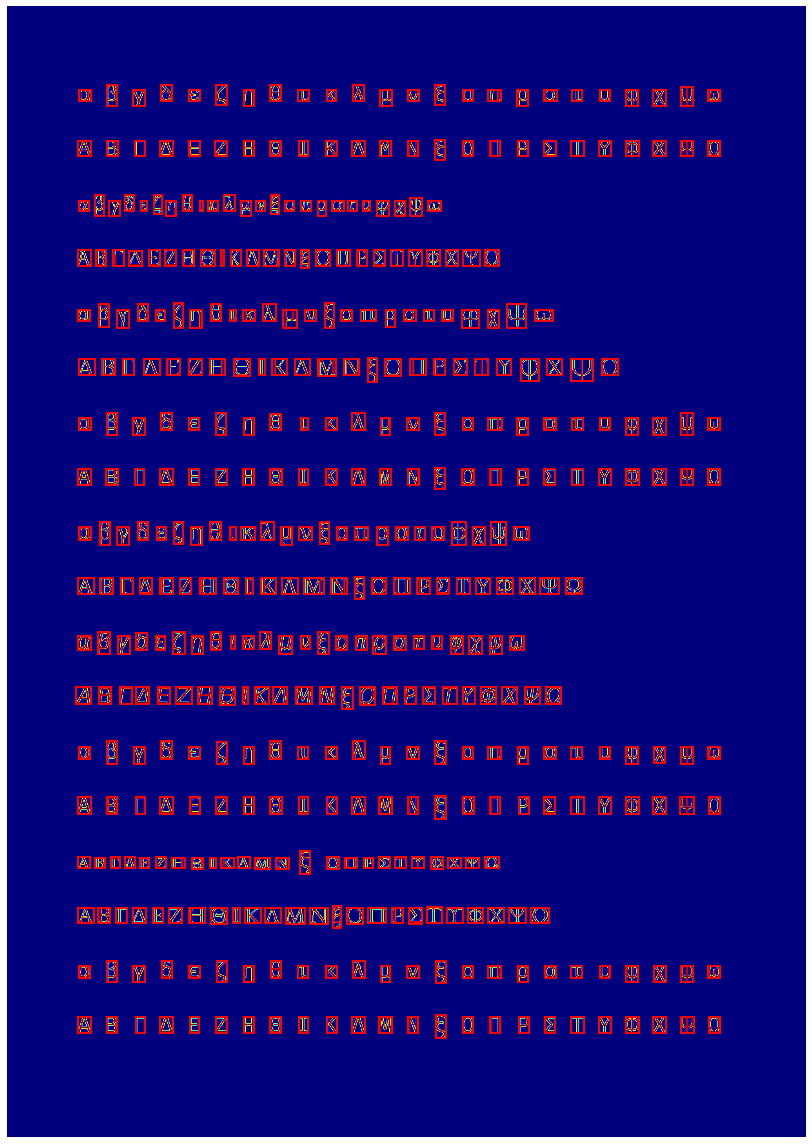

Characters recognized: 432
training character: α (1463/432)
training character: β (1464/432)
training character: γ (1465/432)
training character: δ (1466/432)
training character: ε (1467/432)
training character: ζ (1468/432)
training character: η (1469/432)
training character: θ (1470/432)
training character: ι (1471/432)
training character: κ (1472/432)
training character: λ (1473/432)
training character: μ (1474/432)
training character: ν (1475/432)
training character: ξ (1476/432)
training character: ο (1477/432)
training character: π (1478/432)
training character: ρ (1479/432)
training character: σ (1480/432)
training character: τ (1481/432)
training character: υ (1482/432)
training character: φ (1483/432)
training character: χ (1484/432)
training character: ψ (1485/432)
training character: ω (1486/432)
training character: α (1487/432)
training character: β (1488/432)
training character: γ (1489/432)
training character: δ (1490/432)
training character: ε (1491/432)
training charact

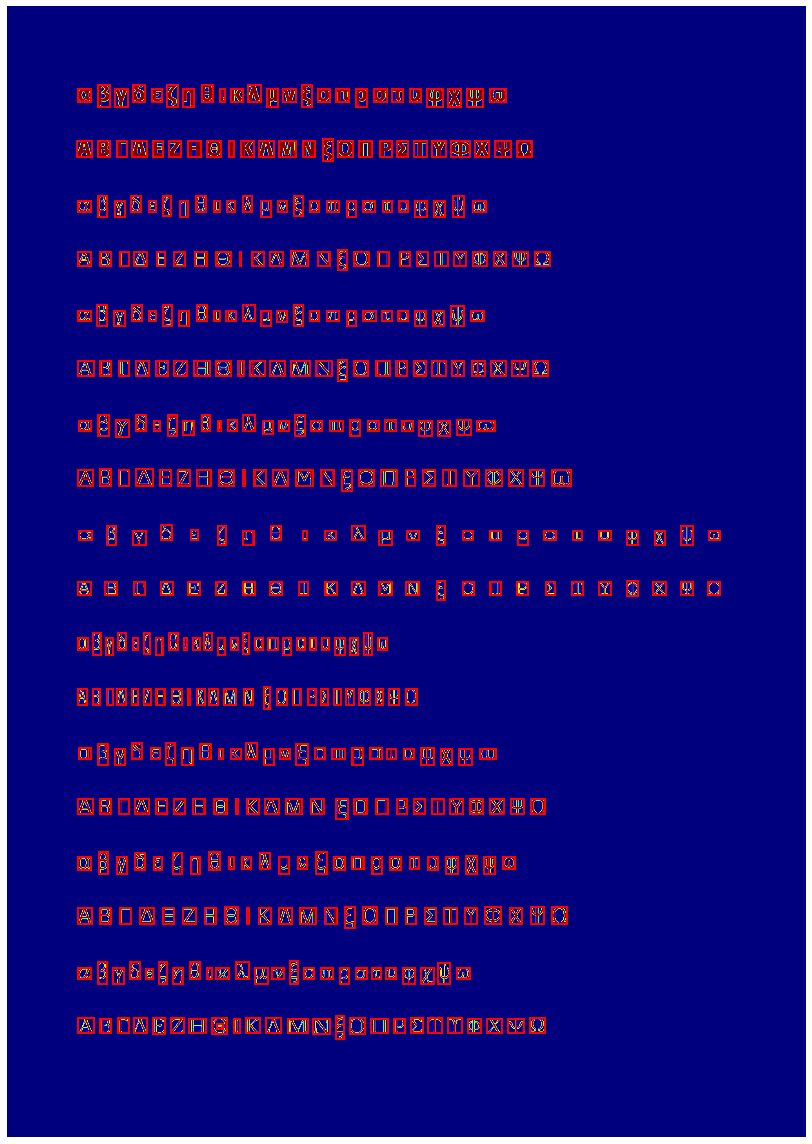

Characters recognized: 432
training character: α (1895/432)
training character: β (1896/432)
training character: γ (1897/432)
training character: δ (1898/432)
training character: ε (1899/432)
training character: ζ (1900/432)
training character: η (1901/432)
training character: θ (1902/432)
training character: ι (1903/432)
training character: κ (1904/432)
training character: λ (1905/432)
training character: μ (1906/432)
training character: ν (1907/432)
training character: ξ (1908/432)
training character: ο (1909/432)
training character: π (1910/432)
training character: ρ (1911/432)
training character: σ (1912/432)
training character: τ (1913/432)
training character: υ (1914/432)
training character: φ (1915/432)
training character: χ (1916/432)
training character: ψ (1917/432)
training character: ω (1918/432)
training character: α (1919/432)
training character: β (1920/432)
training character: γ (1921/432)
training character: δ (1922/432)
training character: ε (1923/432)
training charact

In [ ]:
greek_training = ['./languageRecognition/ocr/training/greek_training/training1.png', './languageRecognition/ocr/training/greek_training/training2.png','./languageRecognition/ocr/training/greek_training/training3.png','./languageRecognition/ocr/training/greek_training/training4.png']
greek_folder = 'αβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψω'
greek_string = 'αβγδεζηθικλμνξοπρστυφχψω'
greek_language = 'greek'

assignLetters(greek_training, greek_folder, greek_string, greek_language)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#to the newly created training type folder
trainingType_files = './languageRecognition/greek/'
#create empty data holders for the training data
data = []
train_label = []

training_start_time = time.time()
#training
for i in greek_string:
    cur_letter = i 
    cur_folder = trainingType_files + cur_letter + '/'
    for j in glob.glob(cur_folder + '*.png'):
      cur_folder = j
      image = imread(cur_folder, 1)
      image = imresize(image, (200,200))
      #hog applied here so that they have the same dimensions
      hog_features = hog(image, orientations=12, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) 
      data.append(hog_features)
      train_label.append(cur_letter)
    print ('labelled ' + cur_letter)

#checking if lists are empty
if not data:
    print("Data List is empty")
if not train_label:
    print(" train_label List is empty")

print("Training the classifier..")
#create the SVC
#clf = LinearSVC(dual = False, verbose = 1)
#clf = svm.SVC(C=0.01, kernel='poly', degree=3, gamma=2)

#clf = KNeighborsClassifier(n_neighbors=3)
#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = DecisionTreeClassifier()
#train the SVM
clf.fit(data, train_label)

print("\nTraining finished successfully")
print (time.time() - training_start_time, "seconds" )

labelled α
labelled β
labelled γ
labelled δ
labelled ε
labelled ζ
labelled η
labelled θ
labelled ι
labelled κ
labelled λ
labelled μ
labelled ν
labelled ξ
labelled ο
labelled π
labelled ρ
labelled σ
labelled τ
labelled υ
labelled φ
labelled χ
labelled ψ
labelled ω
Training the classifier..

Training finished successfully
16.14313006401062 seconds


# Test Images directory

In [ ]:
#Testing image paths
test_image = ['./languageRecognition/ocr/testing/greek_test1.png', './languageRecognition/ocr/testing/greek_test2.png', './languageRecognition/ocr/testing/english_test1.png', './languageRecognition/ocr/testing/english_test2.png', './languageRecognition/ocr/testing/greek_or_english.png']

# Greek Testing

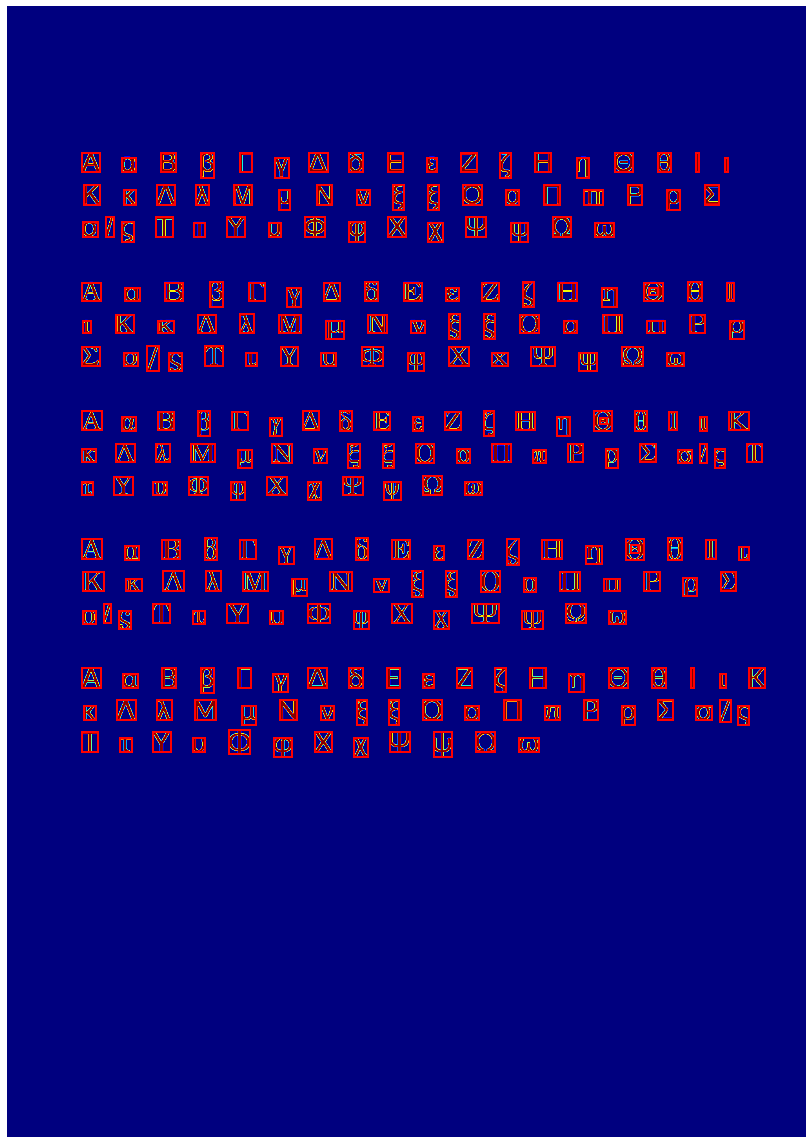

Characters recognized: 250
Sorted the files
Saved and sorted greek test 1 extracts


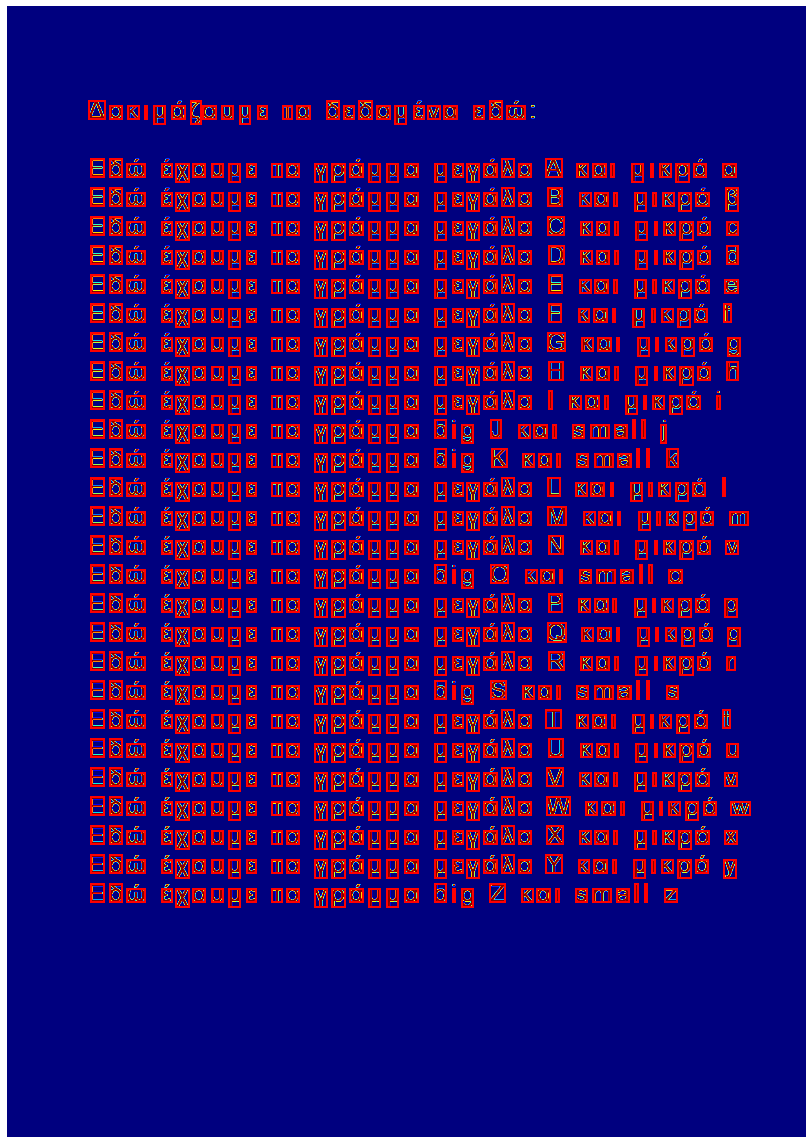

Characters recognized: 867
Sorted the files
Saved and sorted greek test 2 extracts


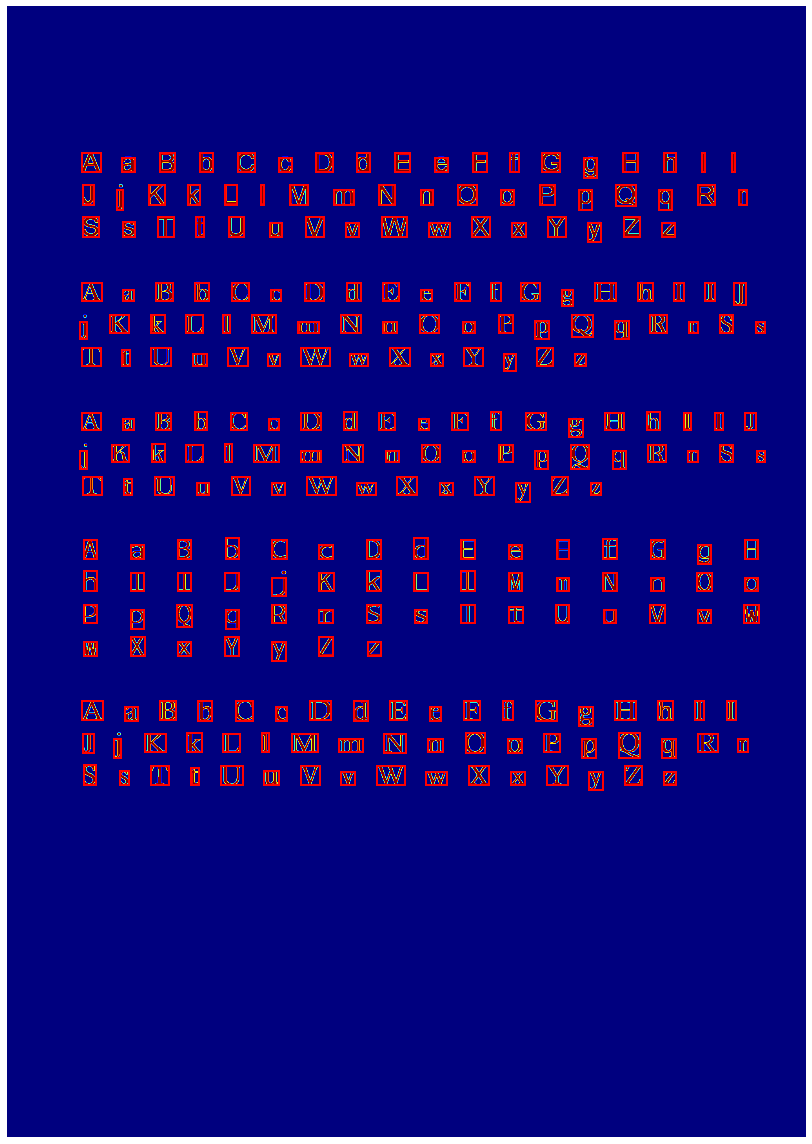

Characters recognized: 260
Sorted the files
Saved and sorted english test 1 extracts


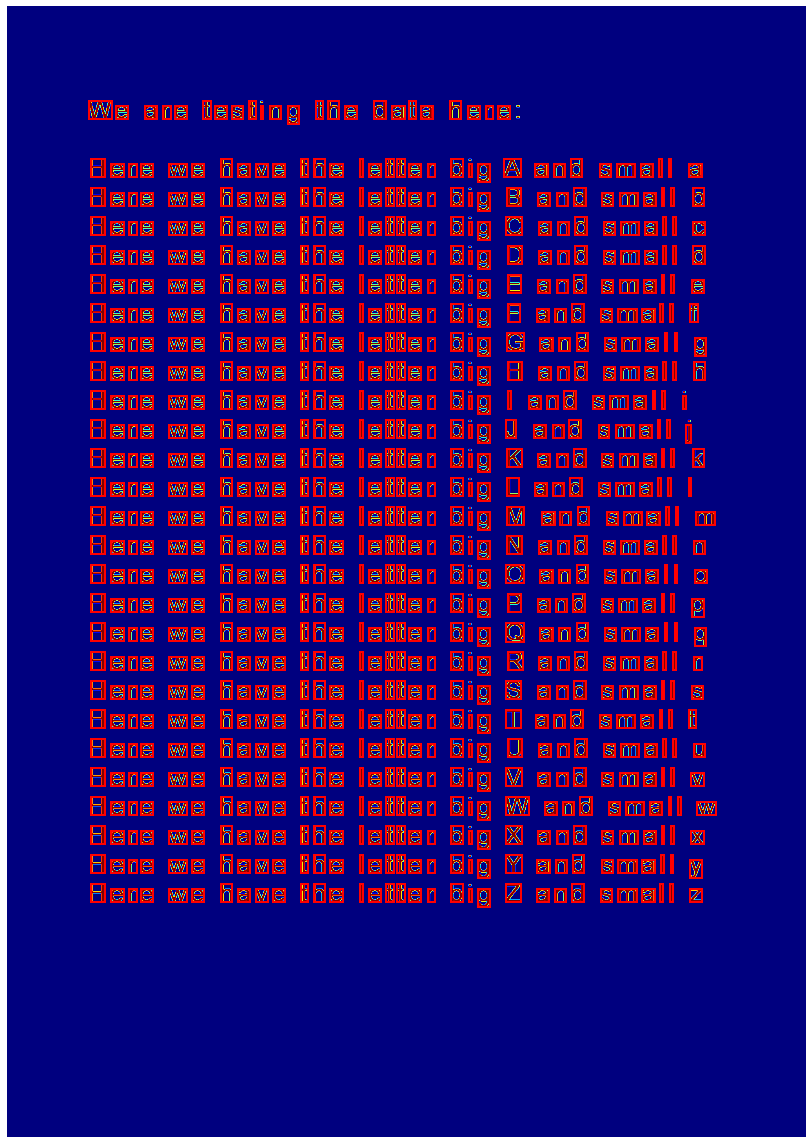

Characters recognized: 855
Sorted the files
Saved and sorted english test2 extracts


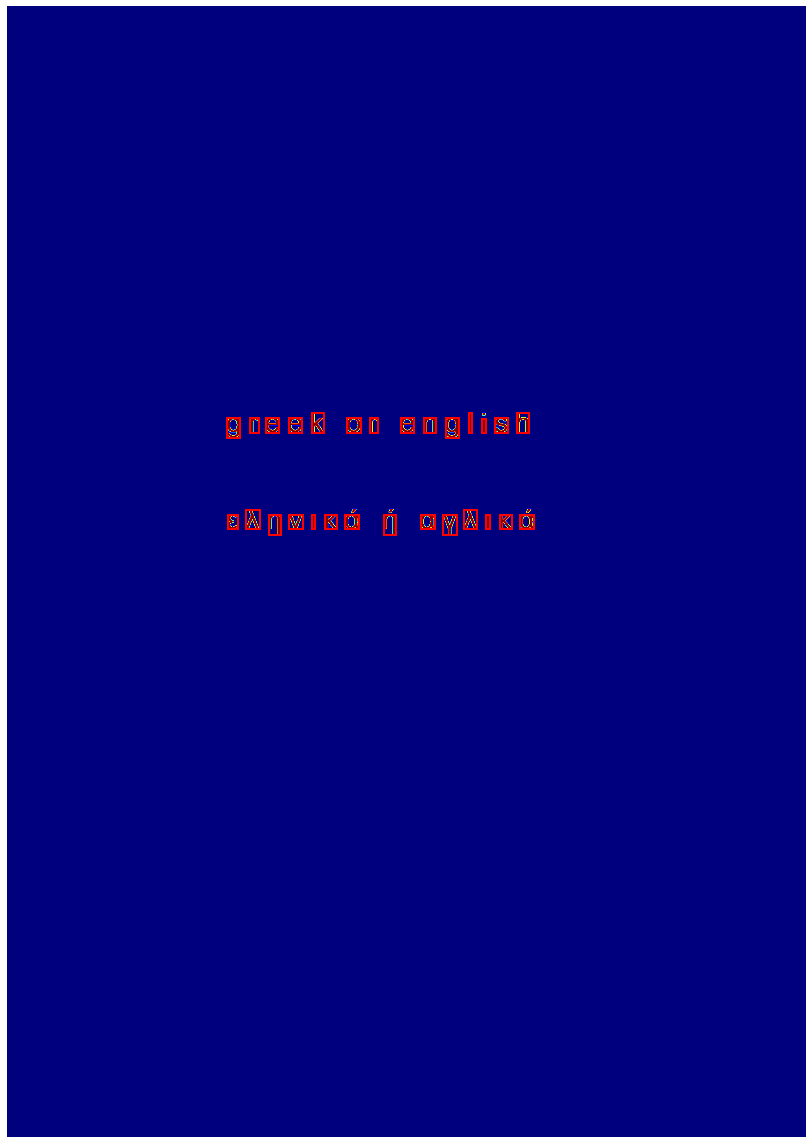

Characters recognized: 28
Sorted the files
Saved and sorted english test2 extracts


In [ ]:

#Delete all files in directory before worked on
mydir = './languageRecognition/ocr/testing/greek1_results'
mydir2 = './languageRecognition/ocr/testing/greek2_results'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))
filelist = [ f for f in os.listdir(mydir2) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir2, f))
  
mydir = './languageRecognition/ocr/testing/english1_results/'
mydir2 = './languageRecognition/ocr/testing/english2_results/'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))
filelist = [ f for f in os.listdir(mydir2) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir2, f))

mydir = './languageRecognition/ocr/testing/greek_or_english_results'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))




#iterate over files
for files in test_image:
  letters = extract2.extractFile(files)
  #letters = Extract_Letters2().extractFile(files)
  string_counter = 0
  if files == './languageRecognition/ocr/testing/greek_test1.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/greek1_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    greek_greek1_file = glob.glob('./languageRecognition/ocr/testing/greek1_results/*.png')
    greek_greek1_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted greek test 1 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/greek_test2.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/greek2_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    greek_greek2_file = glob.glob('./languageRecognition/ocr/testing/greek2_results/*.png')
    greek_greek2_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted greek test 2 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/english_test1.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/english1_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    greek_english1_file = glob.glob('./languageRecognition/ocr/testing/english1_results/*.png')
    greek_english1_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted english test 1 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/english_test2.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/english2_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    greek_english2_file = glob.glob('./languageRecognition/ocr/testing/english2_results/*.png')
    greek_english2_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted english test2 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/greek_or_english.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/greek_or_english_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    greek_greek_or_english_file = glob.glob('./languageRecognition/ocr/testing/greek_or_english_results/*.png')
    greek_greek_or_english_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted english test2 extracts")
    string_keep = string_counter

In [ ]:
#Method to get the truth Strings from the text files
def getTruthFile (filePath):
  with open(filePath, 'r') as file:
    truthFile = file.read().replace('\n', '')
  truthFile = truthFile.lower()
  return truthFile

def read(fileName, arr):
  print("Reading...")
  for i in fileName:
    #print(i)
    cur_folder = i
    image = imread(i, 1)
    image = imresize(image, (200,200))
    hog_features = hog(image, orientations = 12, pixels_per_cell=(16,16), cells_per_block=(1,1))
    hog_feautres = hog_features.reshape(1, -1)
    result = clf.predict(hog_feautres)
    arr.append(result)
  #print(str(len(arr)))
  print("Reading Complete.")

def stringToArray(string, array, results):
  string = string.replace(':', '')
  for i in string:
    array.append(i)
  #removing the white space
  while(" " in array) : 
    array.remove(" ") 
  print(array)
  print("characters expected from results: " + str(len(array)))
  #print(len(array))
  print("chracters detected from results: " + str(len(results)))
  print(results)


def accuracy(truth, results):
  true = 0
  false = 0
  for i in range(len(results)):
    if truth[i] == results[i]:
      true += 1
    else:
      false += 1
  accuracy = round((float(true)/(len(results))*100),3)
  print('Characters recongized correctly: ' + str(true))
  print('Characters recongized incorrectly: ' + str(false))
  print("accuracy: " + str(accuracy))


In [ ]:
#empty array to hold results
greek_greek1_test_results = []
greek_greek2_test_results = []
greek_english1_test_results = []
greek_english2_test_results = []
greek_greek_or_english_test_results = []

#test data extracted, resized and prediction of characters is found and placed in empty array
read(greek_greek1_file, greek_greek1_test_results)
read(greek_greek2_file, greek_greek2_test_results)
read(greek_english1_file, greek_english1_test_results)
read(greek_english2_file, greek_english2_test_results)
read(greek_greek_or_english_file, greek_greek_or_english_test_results)


Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.


In [ ]:
greek1_truth_filePath = "./languageRecognition/ocr/testing/greek1_ground_truth.txt"
greek2_truth_filePath = "./languageRecognition/ocr/testing/greek2_ground_truth.txt"
english1_truth_filePath =  "./languageRecognition/ocr/testing/english1_ground_truth.txt"
english2_truth_filePath = "./languageRecognition/ocr/testing/english2_ground_truth.txt"
greek_or_english_truth_filePath = "./languageRecognition/ocr/testing/greek_or_english_ground_truth.txt"

#getting strings
greek1_truth_string = getTruthFile(greek1_truth_filePath)
greek2_truth_string = getTruthFile(greek2_truth_filePath)
english1_truth_string = getTruthFile(english1_truth_filePath)
english2_truth_string = getTruthFile(english2_truth_filePath)
greek_or_english_truth_string = getTruthFile(greek_or_english_truth_filePath)

real_greek1_array = []
real_greek2_array = []
real_english1_array = []
real_english2_array = []
real_greek_or_english_array = []

print("greek1:")
stringToArray(greek1_truth_string, real_greek1_array, greek_greek1_test_results)
print("\ngreek2:")
stringToArray(greek2_truth_string, real_greek2_array, greek_greek2_test_results)
print("\nenglish1:")
stringToArray(english1_truth_string, real_english1_array, greek_english1_test_results)
print("\nenglish2:")
stringToArray(english2_truth_string, real_english2_array, greek_english2_test_results)
print("\n greek_or_english")
stringToArray(greek_or_english_truth_string, real_greek_or_english_array, greek_greek_or_english_test_results)

greek1:
['α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', 'ω', 'ω', 'α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', 'ω', 'ω', 'α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', 'ω', 'ω', 'α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', '

# Greek Results

In [ ]:
#accuracy calcuting
from sklearn.metrics import accuracy_score

print("greek test 1:")
dec = accuracy_score(real_greek1_array, greek_greek1_test_results)
greek_greek1_accuracy = round((dec*100),3)
print(greek_greek1_accuracy)

print("\ngreek test 2:")
dec = accuracy_score(real_greek2_array, greek_greek2_test_results)
greek_greek2_accuracy = round((dec*100),3)
print(greek_greek2_accuracy)

print("\nenglish test 1:")
dec = accuracy_score(real_english1_array, greek_english1_test_results)
greek_english1_accuracy = round((dec*100),3)
print(greek_english1_accuracy)

print("\nenglish test 2:")
dec = accuracy_score(real_english2_array, greek_english2_test_results)
greek_english2_accuracy = round((dec*100),3)
print(greek_english2_accuracy)

print("\ngreek_or_english:")
dec = accuracy_score(real_greek_or_english_array, greek_greek_or_english_test_results)
greek_greek_or_english_accuracy = round((dec*100),3)
print(greek_greek_or_english_accuracy)

greek test 1:
72.4

greek test 2:
49.02

english test 1:
0.0

english test 2:
0.0

greek_or_english:
32.143


# English Training

Extracting characters...


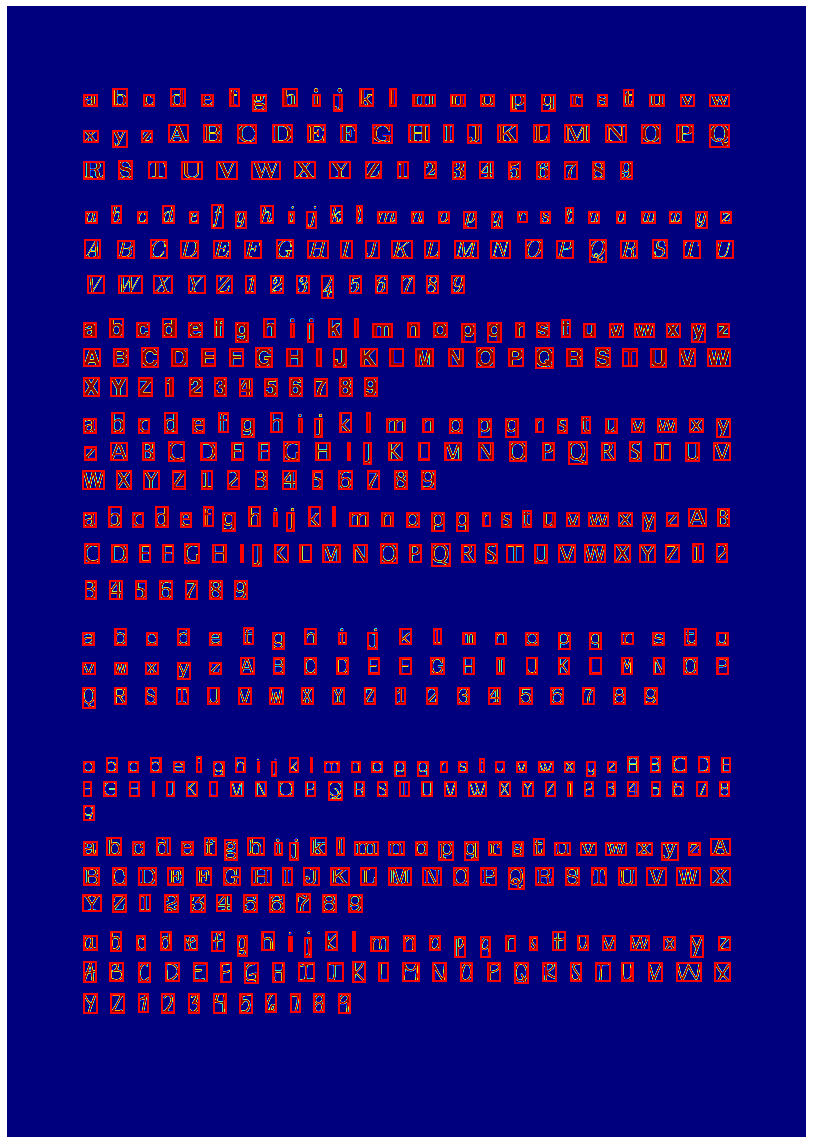

Characters recognized: 549
training character: a (600/549)
training character: b (601/549)
training character: c (602/549)
training character: d (603/549)
training character: e (604/549)
training character: f (605/549)
training character: g (606/549)
training character: h (607/549)
training character: i (608/549)
training character: j (609/549)
training character: k (610/549)
training character: l (611/549)
training character: m (612/549)
training character: n (613/549)
training character: o (614/549)
training character: p (615/549)
training character: q (616/549)
training character: r (617/549)
training character: s (618/549)
training character: t (619/549)
training character: u (620/549)
training character: v (621/549)
training character: w (622/549)
training character: x (623/549)
training character: y (624/549)
training character: z (625/549)
training character: a (626/549)
training character: b (627/549)
training character: c (628/549)
training character: d (629/549)
training char

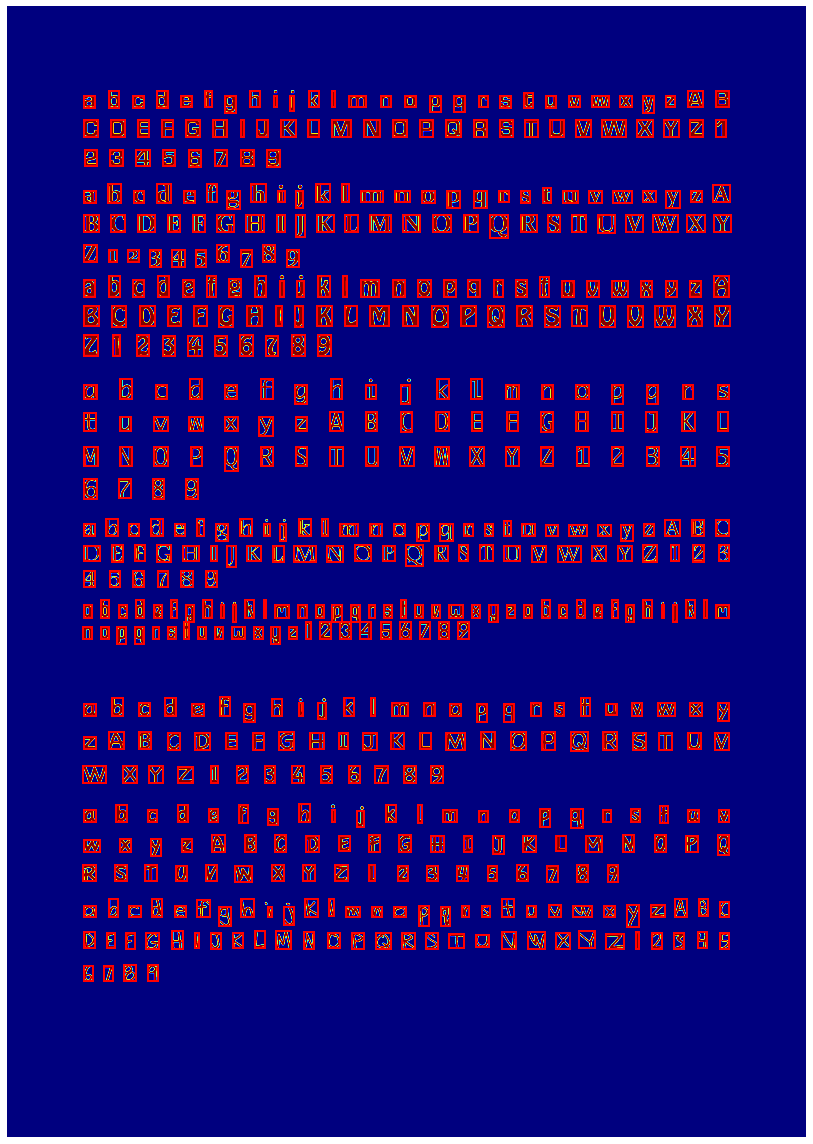

Characters recognized: 549
training character: a (1149/549)
training character: b (1150/549)
training character: c (1151/549)
training character: d (1152/549)
training character: e (1153/549)
training character: f (1154/549)
training character: g (1155/549)
training character: h (1156/549)
training character: i (1157/549)
training character: j (1158/549)
training character: k (1159/549)
training character: l (1160/549)
training character: m (1161/549)
training character: n (1162/549)
training character: o (1163/549)
training character: p (1164/549)
training character: q (1165/549)
training character: r (1166/549)
training character: s (1167/549)
training character: t (1168/549)
training character: u (1169/549)
training character: v (1170/549)
training character: w (1171/549)
training character: x (1172/549)
training character: y (1173/549)
training character: z (1174/549)
training character: a (1175/549)
training character: b (1176/549)
training character: c (1177/549)
training charact

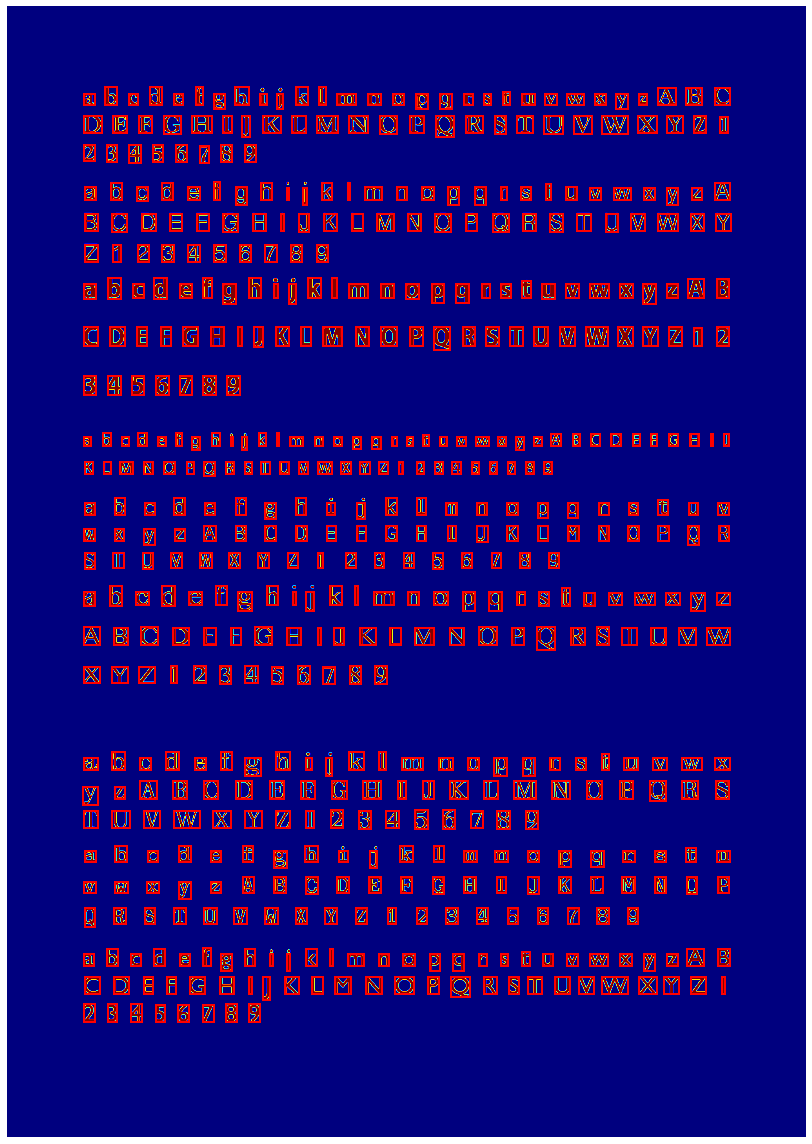

Characters recognized: 549
training character: a (1698/549)
training character: b (1699/549)
training character: c (1700/549)
training character: d (1701/549)
training character: e (1702/549)
training character: f (1703/549)
training character: g (1704/549)
training character: h (1705/549)
training character: i (1706/549)
training character: j (1707/549)
training character: k (1708/549)
training character: l (1709/549)
training character: m (1710/549)
training character: n (1711/549)
training character: o (1712/549)
training character: p (1713/549)
training character: q (1714/549)
training character: r (1715/549)
training character: s (1716/549)
training character: t (1717/549)
training character: u (1718/549)
training character: v (1719/549)
training character: w (1720/549)
training character: x (1721/549)
training character: y (1722/549)
training character: z (1723/549)
training character: a (1724/549)
training character: b (1725/549)
training character: c (1726/549)
training charact

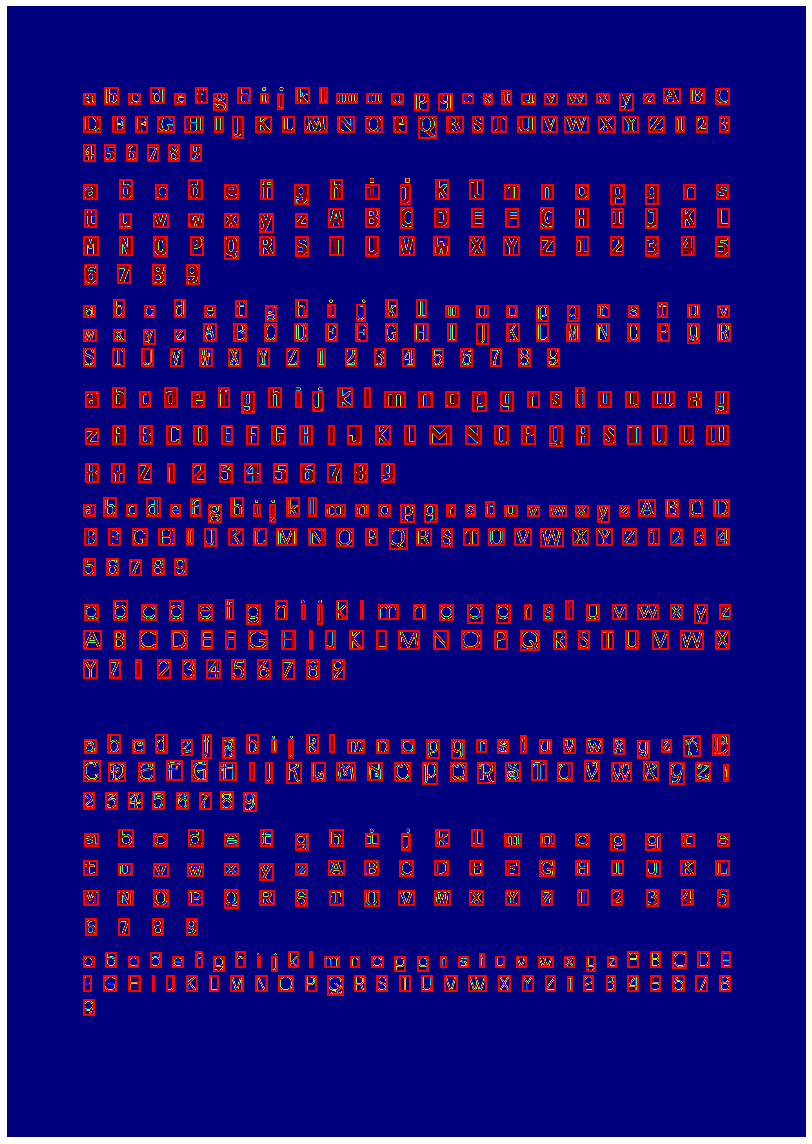

Characters recognized: 549
training character: a (2247/549)
training character: b (2248/549)
training character: c (2249/549)
training character: d (2250/549)
training character: e (2251/549)
training character: f (2252/549)
training character: g (2253/549)
training character: h (2254/549)
training character: i (2255/549)
training character: j (2256/549)
training character: k (2257/549)
training character: l (2258/549)
training character: m (2259/549)
training character: n (2260/549)
training character: o (2261/549)
training character: p (2262/549)
training character: q (2263/549)
training character: r (2264/549)
training character: s (2265/549)
training character: t (2266/549)
training character: u (2267/549)
training character: v (2268/549)
training character: w (2269/549)
training character: x (2270/549)
training character: y (2271/549)
training character: z (2272/549)
training character: a (2273/549)
training character: b (2274/549)
training character: c (2275/549)
training charact

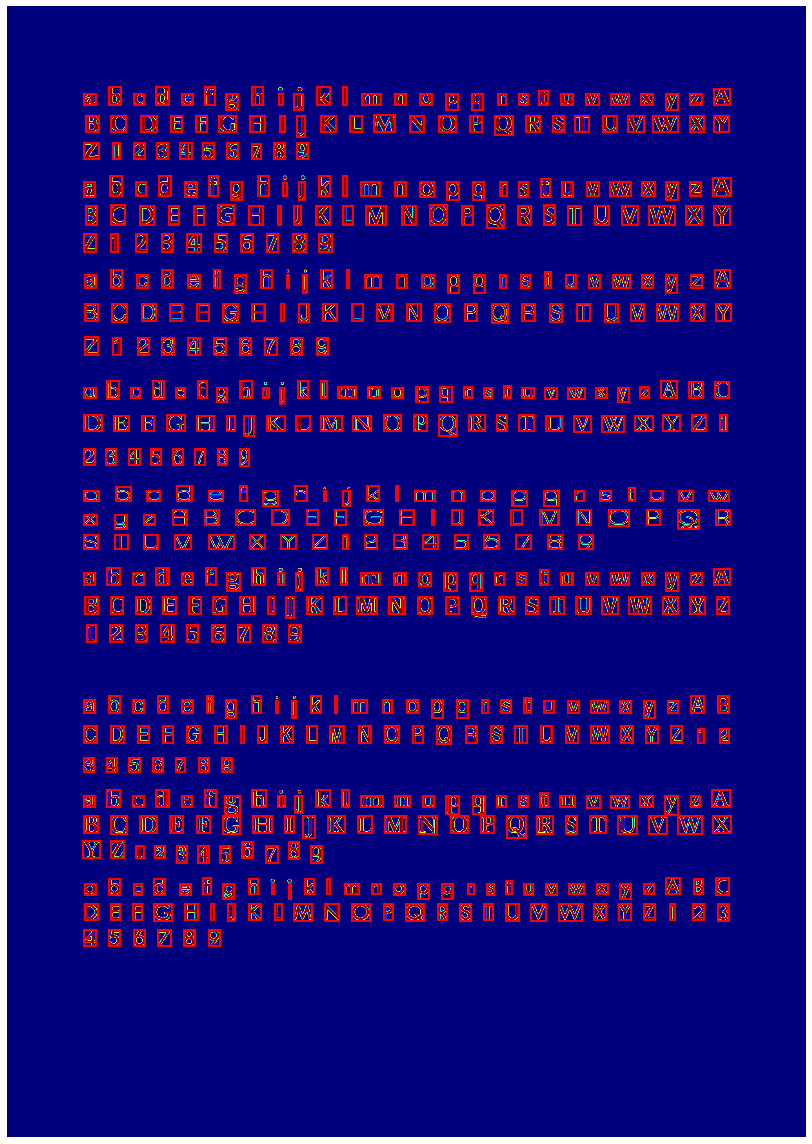

Characters recognized: 549
training character: a (2796/549)
training character: b (2797/549)
training character: c (2798/549)
training character: d (2799/549)
training character: e (2800/549)
training character: f (2801/549)
training character: g (2802/549)
training character: h (2803/549)
training character: i (2804/549)
training character: j (2805/549)
training character: k (2806/549)
training character: l (2807/549)
training character: m (2808/549)
training character: n (2809/549)
training character: o (2810/549)
training character: p (2811/549)
training character: q (2812/549)
training character: r (2813/549)
training character: s (2814/549)
training character: t (2815/549)
training character: u (2816/549)
training character: v (2817/549)
training character: w (2818/549)
training character: x (2819/549)
training character: y (2820/549)
training character: z (2821/549)
training character: a (2822/549)
training character: b (2823/549)
training character: c (2824/549)
training charact

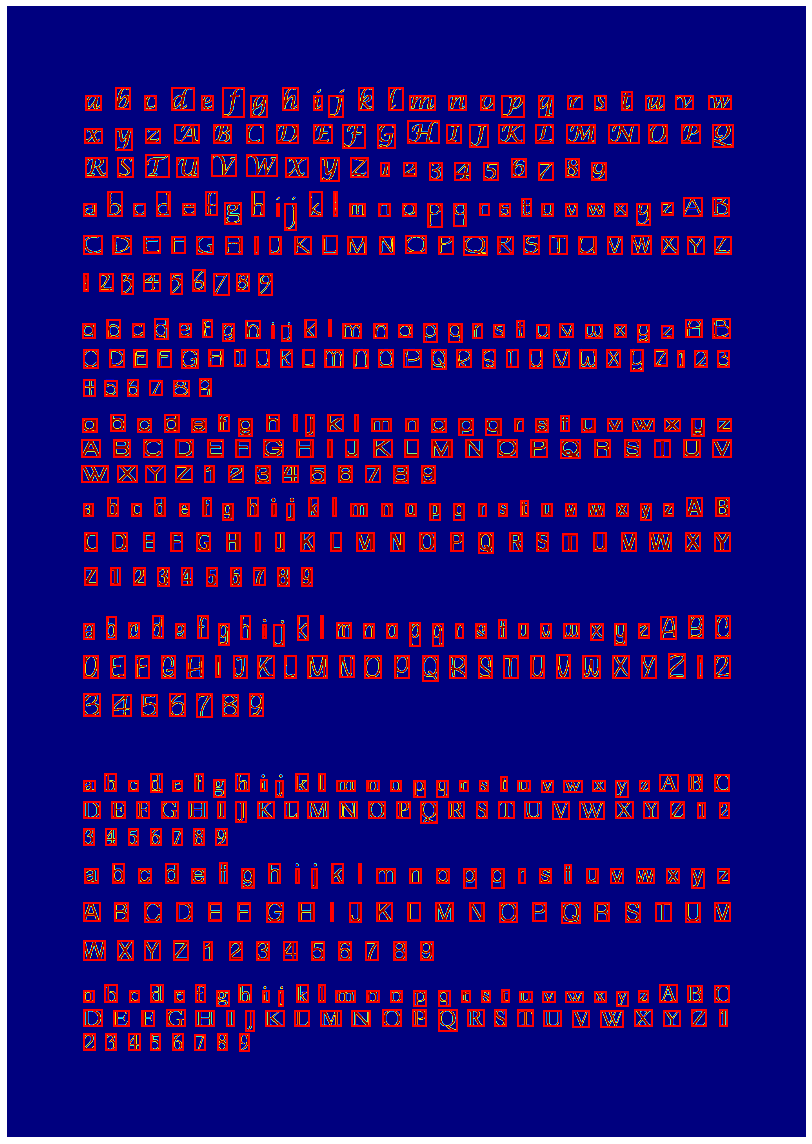

Characters recognized: 549
training character: a (3345/549)
training character: b (3346/549)
training character: c (3347/549)
training character: d (3348/549)
training character: e (3349/549)
training character: f (3350/549)
training character: g (3351/549)
training character: h (3352/549)
training character: i (3353/549)
training character: j (3354/549)
training character: k (3355/549)
training character: l (3356/549)
training character: m (3357/549)
training character: n (3358/549)
training character: o (3359/549)
training character: p (3360/549)
training character: q (3361/549)
training character: r (3362/549)
training character: s (3363/549)
training character: t (3364/549)
training character: u (3365/549)
training character: v (3366/549)
training character: w (3367/549)
training character: x (3368/549)
training character: y (3369/549)
training character: z (3370/549)
training character: a (3371/549)
training character: b (3372/549)
training character: c (3373/549)
training charact

In [ ]:
#now for english
english_training = ['./languageRecognition/ocr/training/english_training/training1.png', './languageRecognition/ocr/training/english_training/training2.png','./languageRecognition/ocr/training/english_training/training3.png','./languageRecognition/ocr/training/english_training/training4.png','./languageRecognition/ocr/training/english_training/training5.png','./languageRecognition/ocr/training/english_training/training6.png']
english_folder = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'
english_string = 'abcdefghijklmnopqrstuvwxyz123456789'
english_language = 'english'

assignLetters(english_training, english_folder, english_string, english_language)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#to the newly created training type folder
trainingType_files = './languageRecognition/english/'
#create empty data holders for the training data
data = []
train_label = []

training_start_time = time.time()
#training
for i in english_string:
    cur_letter = i 
    cur_folder = trainingType_files + cur_letter + '/'
    for j in glob.glob(cur_folder + '*.png'):
      cur_folder = j
      image = imread(cur_folder, 1)
      image = imresize(image, (200,200))
      #hog applied here so that they have the same dimensions
      hog_features = hog(image, orientations=12, pixels_per_cell=(16, 16), cells_per_block=(1, 1)) 
      data.append(hog_features)
      train_label.append(cur_letter)
    print ('labelled ' + cur_letter)

#checking if lists are empty
if not data:
    print("Data List is empty")
if not train_label:
    print(" train_label List is empty")

print("Training the svm...")
#create the SVC
#clf = LinearSVC(dual = False, verbose = 1)
#clf = svm.SVC(C=0.01, kernel='poly', degree=3, gamma=2)

#clf = KNeighborsClassifier(n_neighbors=3)
#clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = DecisionTreeClassifier()
#train the SVM
clf.fit(data, train_label)

print("\nTraining finished successfully")
print (time.time() - training_start_time, "seconds" )

labelled a
labelled b
labelled c
labelled d
labelled e
labelled f
labelled g
labelled h
labelled i
labelled j
labelled k
labelled l
labelled m
labelled n
labelled o
labelled p
labelled q
labelled r
labelled s
labelled t
labelled u
labelled v
labelled w
labelled x
labelled y
labelled z
labelled 1
labelled 2
labelled 3
labelled 4
labelled 5
labelled 6
labelled 7
labelled 8
labelled 9
Training the svm...

Training finished successfully
30.776966333389282 seconds


# English Testing

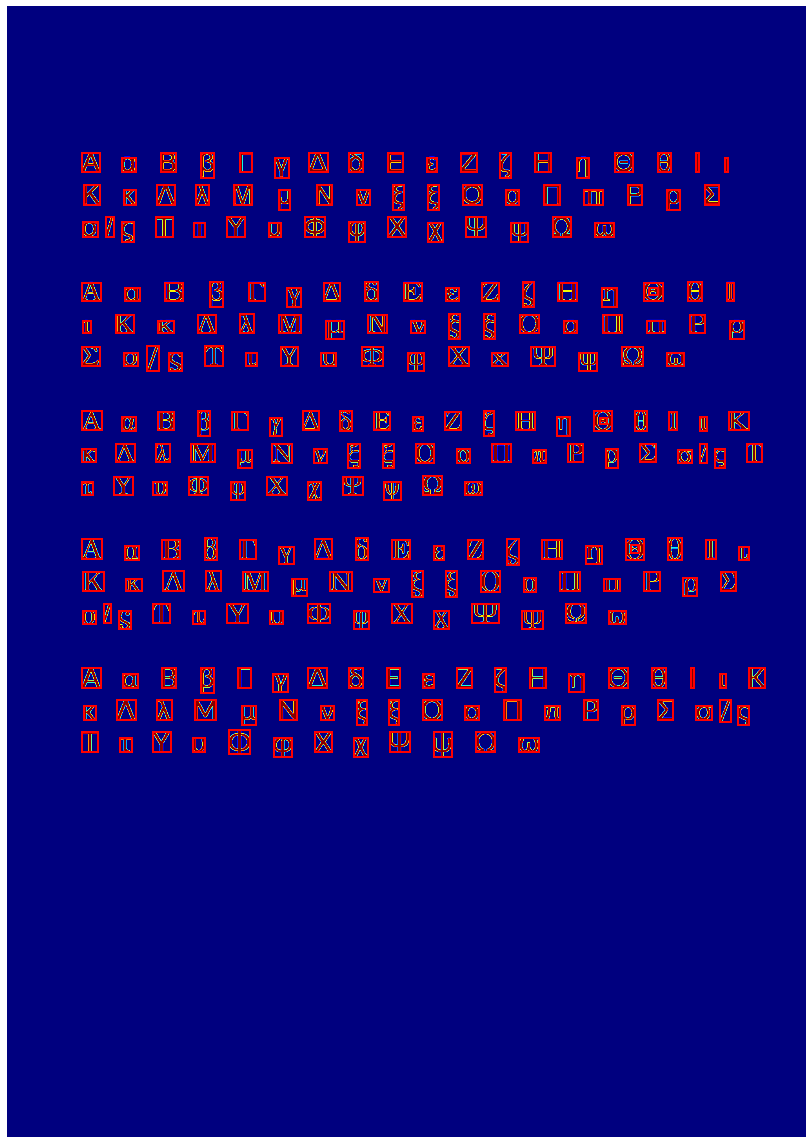

Characters recognized: 250
Sorted the files
Saved and sorted greek test 1 extracts


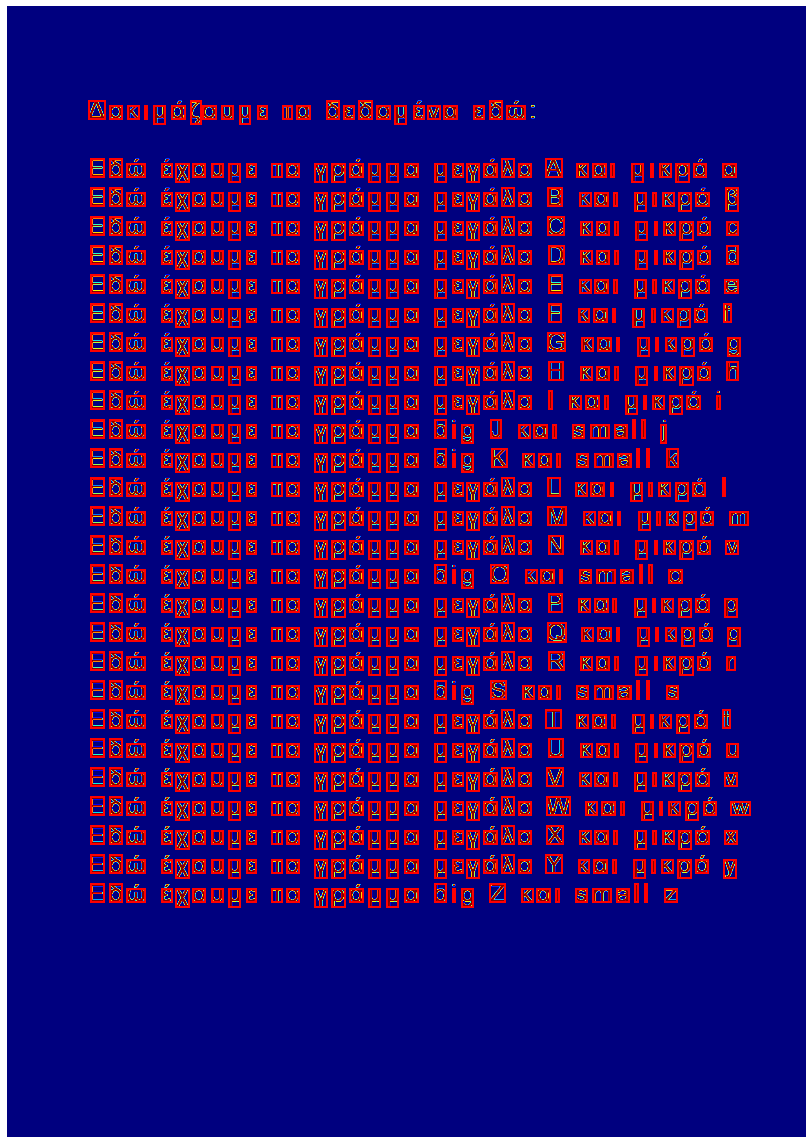

Characters recognized: 867
Sorted the files
Saved and sorted greek test 2 extracts


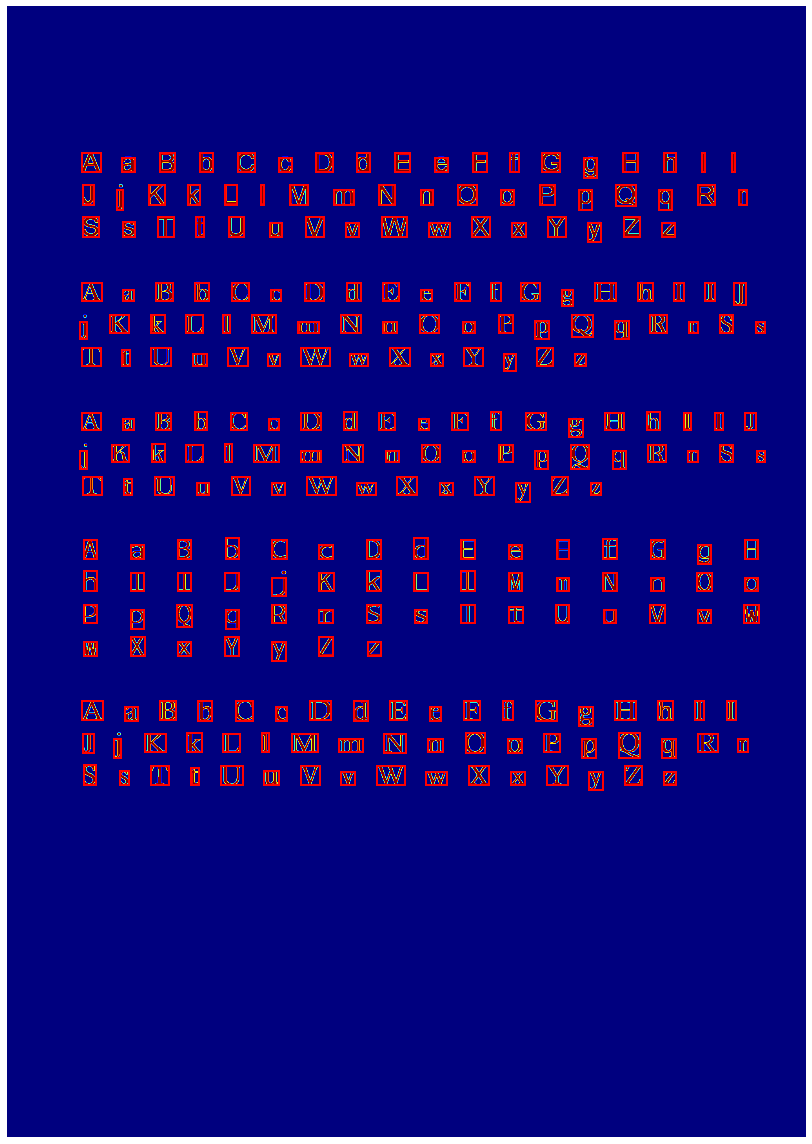

Characters recognized: 260
Sorted the files
Saved and sorted english test 1 extracts


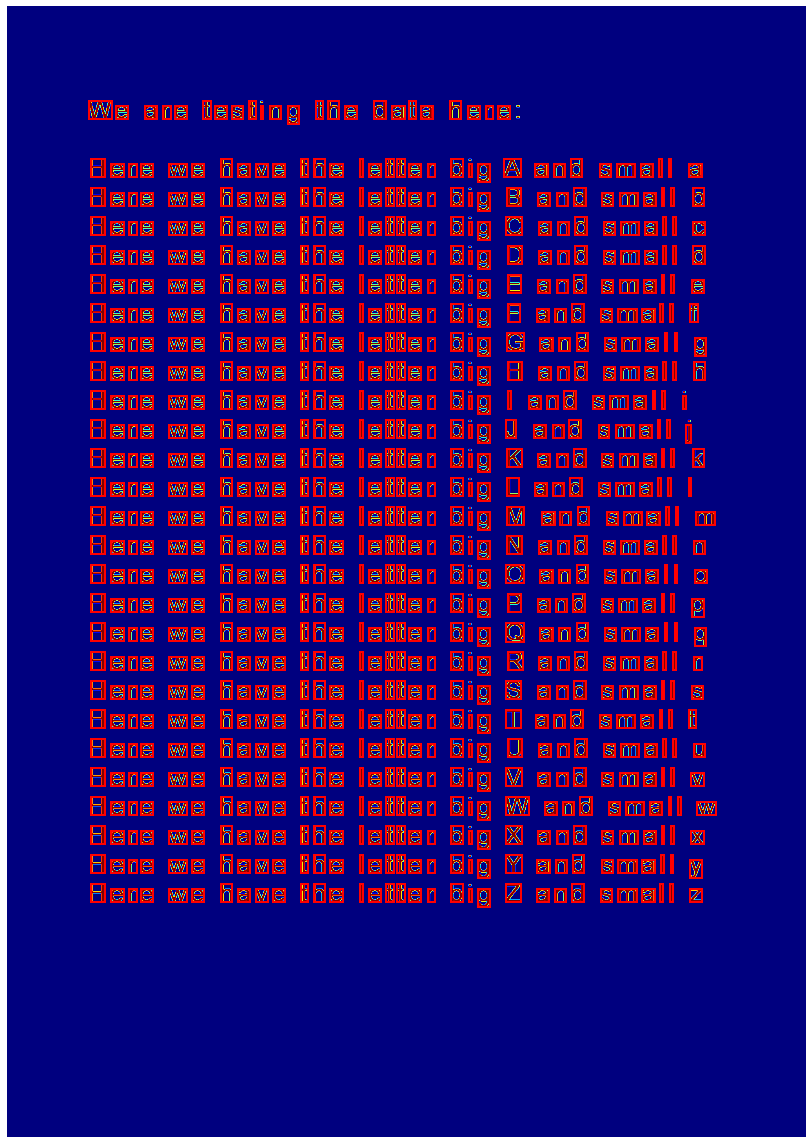

Characters recognized: 855
Sorted the files
Saved and sorted english test2 extracts


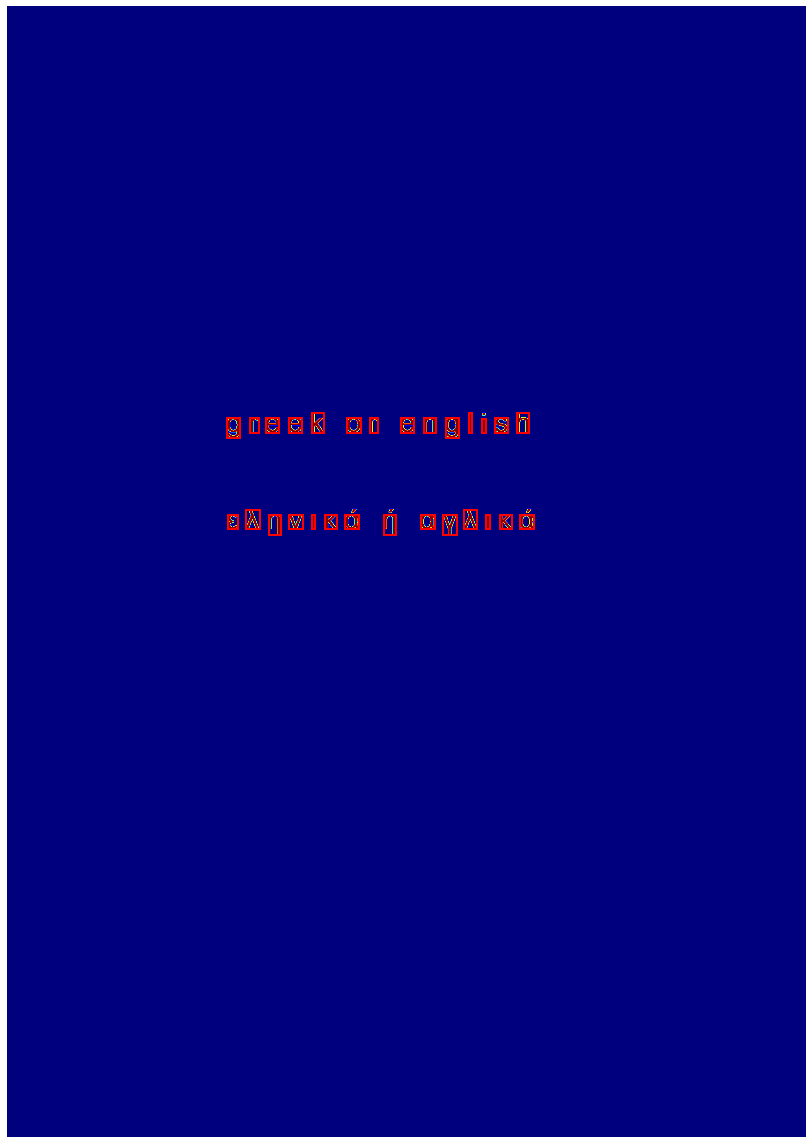

Characters recognized: 28
Sorted the files
Saved and sorted english test 1 extracts


In [ ]:
#this is for the english files
#Testing image paths

#Delete all files in directory before worked on
mydir = './languageRecognition/ocr/testing/greek1_results'
mydir2 = './languageRecognition/ocr/testing/greek2_results'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))
filelist = [ f for f in os.listdir(mydir2) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir2, f))
  
mydir = './languageRecognition/ocr/testing/english1_results/'
mydir2 = './languageRecognition/ocr/testing/english2_results/'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))
filelist = [ f for f in os.listdir(mydir2) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir2, f))

mydir = './languageRecognition/ocr/testing/greek_or_english_results'
filelist = [ f for f in os.listdir(mydir) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(mydir, f))



#iterate over files
for files in test_image:
  letters = extract2.extractFile(files)
  string_counter = 0
  if files == './languageRecognition/ocr/testing/greek_test1.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/greek1_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    english_greek1_file = glob.glob('./languageRecognition/ocr/testing/greek1_results/*.png')
    english_greek1_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted greek test 1 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/greek_test2.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/greek2_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    english_greek2_file = glob.glob('./languageRecognition/ocr/testing/greek2_results/*.png')
    english_greek2_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted greek test 2 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/english_test1.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/english1_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    english_english1_file = glob.glob('./languageRecognition/ocr/testing/english1_results/*.png')
    english_english1_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted english test 1 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/english_test2.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/english2_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number 
    print("Sorted the files")
    english_english2_file = glob.glob('./languageRecognition/ocr/testing/english2_results/*.png')
    english_english2_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted english test2 extracts")
    string_keep = string_counter
  elif files == './languageRecognition/ocr/testing/greek_or_english.png':
    for i in letters:
      imsave('./languageRecognition/ocr/testing/greek_or_english_results/' + str(string_counter) + '.png', i)    
      string_counter += 1
    #Sort files in order of number
    print("Sorted the files")
    english_greek_or_english_file = glob.glob('./languageRecognition/ocr/testing/greek_or_english_results/*.png')
    english_greek_or_english_file.sort(key = lambda f: int(''.join(filter(str.isdigit, f)))) 
    print("Saved and sorted english test 1 extracts")
    string_keep = string_counter

In [ ]:
#empty array to hold results
english_greek1_test_results = []
english_greek2_test_results = []
english_english1_test_results = []
english_english2_test_results = []
english_greek_or_english_test_results = []

#test data extracted, resized and prediction of characters is found and placed in empty array
read(english_greek1_file, english_greek1_test_results)
read(english_greek2_file, english_greek2_test_results)
read(english_english1_file, english_english1_test_results)
read(english_english2_file, english_english2_test_results)
read(english_greek_or_english_file, english_greek_or_english_test_results)


Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.
Reading...
Reading Complete.


In [ ]:
greek1_truth_filePath = "./languageRecognition/ocr/testing/greek1_ground_truth.txt"
greek2_truth_filePath = "./languageRecognition/ocr/testing/greek2_ground_truth.txt"
english1_truth_filePath =  "./languageRecognition/ocr/testing/english1_ground_truth.txt"
english2_truth_filePath = "./languageRecognition/ocr/testing/english2_ground_truth.txt"
greek_or_english_truth_filePath = "./languageRecognition/ocr/testing/greek_or_english_ground_truth.txt"

#getting strings
greek1_truth_string = getTruthFile(greek1_truth_filePath)
greek2_truth_string = getTruthFile(greek2_truth_filePath)
english1_truth_string = getTruthFile(english1_truth_filePath)
english2_truth_string = getTruthFile(english2_truth_filePath)
greek_or_english_truth_string = getTruthFile(greek_or_english_truth_filePath)

real_greek1_array = []
real_greek2_array = []
real_english1_array = []
real_english2_array = []
real_greek_or_english_array = []

print("greek1:")
stringToArray(greek1_truth_string, real_greek1_array, english_greek1_test_results)
print("\ngreek2:")
stringToArray(greek2_truth_string, real_greek2_array, english_greek2_test_results)
print("\nenglish1:")
stringToArray(english1_truth_string, real_english1_array, english_english1_test_results)
print("\nenglish2:")
stringToArray(english2_truth_string, real_english2_array, english_english2_test_results)
print("\ngreek_or_english:")
stringToArray(greek_or_english_truth_string, real_greek_or_english_array, english_greek_or_english_test_results)

greek1:
['α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', 'ω', 'ω', 'α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', 'ω', 'ω', 'α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', 'ω', 'ω', 'α', 'α', 'β', 'β', 'γ', 'γ', 'δ', 'δ', 'ε', 'ε', 'ζ', 'ζ', 'η', 'η', 'θ', 'θ', 'ι', 'ι', 'κ', 'κ', 'λ', 'λ', 'μ', 'μ', 'ν', 'ν', 'ξ', 'ξ', 'ο', 'ο', 'π', 'π', 'ρ', 'ρ', 'σ', 'σ', '/', 'ς', 'τ', 'τ', 'υ', 'υ', 'φ', 'φ', 'χ', 'χ', 'ψ', 'ψ', '

# English Results

In [ ]:
#@title
#accuracy calcuting
from sklearn.metrics import accuracy_score

print("greek test 1:")
dec = accuracy_score(real_greek1_array, english_greek1_test_results)
english_greek1_accuracy = round((dec*100),3)
print(english_greek1_accuracy)

print("\ngreek test 2:")
dec = accuracy_score(real_greek2_array, english_greek2_test_results)
english_greek2_accuracy = round((dec*100),3)
print(english_greek2_accuracy)

print("\nenglish test 1:")
dec = accuracy_score(real_english1_array, english_english1_test_results)
english_english1_accuracy = round((dec*100),3)
print(english_english1_accuracy)

print("\nenglish test 2:")
dec = accuracy_score(real_english2_array, english_english2_test_results)
english_english2_accuracy = round((dec*100),3)
print(english_english2_accuracy)

print("\ngreek_or_english")
dec = accuracy_score(real_greek_or_english_array, english_greek_or_english_test_results)
english_greek_or_english_accuracy = round((dec*100),3)
print(english_greek_or_english_accuracy)

greek test 1:
0.0

greek test 2:
8.074

english test 1:
75.385

english test 2:
87.251

greek_or_english
35.714


# Are my results English or Greek?


In [ ]:
def compare(eng, greek):
  lang1 = 'GREEK'
  lang2 = 'ENGLISH'
  print("English Accuracy: " + str(eng))
  print("Greek Accuracy: " + str(greek))
  if abs(eng-greek) > 24 and eng>greek: 
    print("This is written mostly in ENGLISH" )
  elif abs(eng-greek) > 24 and eng < greek :
    print("This is written mostly in GREEK")
  elif abs(eng-greek) < 24:
    print("The algorithm is not sure!")
    if (eng < greek):
      print("Although it is most likey wriiten in " + lang1)
    if (eng > greek):
      print("Although it is most likey wriiten in " + lang2)

In [ ]:
#is greek test 1   in GREEK?
print("What language is greek_test1? ")
compare(english_greek1_accuracy, greek_greek1_accuracy)
print("\nWhat language is greek_test2? ")
compare(english_greek2_accuracy, greek_greek2_accuracy)
print("\nWhat language is english_test1? ")
compare(english_english1_accuracy, greek_english1_accuracy)
print("\nWhat language is english_test2? ")
compare(english_english2_accuracy, greek_english2_accuracy)
print("\nWhat language is greek_or_english? ")
compare(english_greek_or_english_accuracy, greek_greek_or_english_accuracy)

What language is greek_test1? 
English Accuracy: 0.0
Greek Accuracy: 72.4
This is written mostly in GREEK

What language is greek_test2? 
English Accuracy: 8.074
Greek Accuracy: 49.02
This is written mostly in GREEK

What language is english_test1? 
English Accuracy: 75.385
Greek Accuracy: 0.0
This is written mostly in ENGLISH

What language is english_test2? 
English Accuracy: 87.251
Greek Accuracy: 0.0
This is written mostly in ENGLISH

What language is greek_or_english? 
English Accuracy: 35.714
Greek Accuracy: 32.143
The algorithm is not sure!
Although it is most likey wriiten in ENGLISH


In [ ]:

from sklearn import metrics
print(metrics.classification_report(real_greek2_array, english_greek2_test_results))

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         0
           a       0.05      1.00      0.09         5
           b       0.83      1.00      0.91         5
           c       1.00      0.50      0.67         2
           d       0.06      1.00      0.12         2
           e       0.07      1.00      0.13         2
           f       1.00      0.50      0.67         2
           g       1.00      1.00      1.00         7
           h       1.00      1.00      1.00         2
           i       0.11      1.00      0.19         7
           j       1.00      0.50      0.67         2
           k       0.01      1.00      0.02         2
           l       1.00      0.08      0.15        12
           m       1.00      1.00      1.00         7
           n       0.00      0.00      0.00         0
           o       0.01      1.00      0.03         2
           p       1.00      1.00      1.00         2
           q       1.00    

ValueError: ignored